In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras.models import Sequential

In [2]:
df= pd.read_csv('/content/Churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
target= df['Exited']

In [6]:
target

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [10]:
features=df.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)

In [11]:
features


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [12]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [18]:
lab_enc= LabelEncoder()

In [19]:
features['Geography']= lab_enc.fit_transform(features[['Geography']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,Male,39,5,0.00,2,1,0,96270.64
9996,516,0,Male,35,10,57369.61,1,1,1,101699.77
9997,709,0,Female,36,7,0.00,1,0,1,42085.58
9998,772,1,Male,42,3,75075.31,2,1,0,92888.52


In [21]:
pd.get_dummies(features['Gender'])

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [22]:
features= pd.get_dummies(features)

In [23]:
features

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male
0,619,0,42,2,0.00,1,1,1,101348.88,1,0
1,608,2,41,1,83807.86,1,0,1,112542.58,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0
4,850,2,43,2,125510.82,1,1,1,79084.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1


In [24]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

In [26]:
std_scale= StandardScaler()

In [27]:
x_train= std_scale.fit_transform(x_train)
x_test= std_scale.fit_transform(x_test)

In [28]:
x_train

array([[ 0.97797456,  1.51184189, -0.2812589 , ..., -0.22701633,
        -0.91162201,  0.91162201],
       [-0.301349  , -0.9065892 , -0.37645461, ..., -1.74872617,
        -0.91162201,  0.91162201],
       [ 0.46832534,  1.51184189,  0.6706982 , ..., -0.76732178,
        -0.91162201,  0.91162201],
       ...,
       [ 0.22910223, -0.9065892 ,  0.38511107, ...,  1.17328982,
         1.09694587, -1.09694587],
       [-0.60297813, -0.9065892 , -0.75723744, ...,  0.282817  ,
         1.09694587, -1.09694587],
       [-1.79909365,  0.30262634, -1.42360741, ...,  1.09224823,
         1.09694587, -1.09694587]])

In [29]:
x_test

array([[-0.20581747,  0.31848772, -1.51649662, ...,  0.81347408,
        -0.91481399,  0.91481399],
       [-0.59307554,  0.31848772, -0.65395778, ...,  1.08300237,
         1.09311839, -1.09311839],
       [ 0.35468762,  0.31848772, -0.55812013, ...,  0.37686295,
        -0.91481399,  0.91481399],
       ...,
       [ 0.7929007 , -0.88790515, -0.36644483, ..., -0.7887273 ,
         1.09311839, -1.09311839],
       [ 0.94576573,  0.31848772,  1.16695754, ..., -1.21357145,
        -0.91481399,  0.91481399],
       [-1.47969269,  1.52488059, -0.94147072, ..., -0.08517865,
         1.09311839, -1.09311839]])

In [30]:
y_train

314     0
8722    0
668     0
3353    0
9839    0
       ..
350     0
79      0
8039    0
6936    0
5640    1
Name: Exited, Length: 7500, dtype: int64

In [31]:
y_train= keras.utils.to_categorical(y_train)
y_test= keras.utils.to_categorical(y_test)

In [32]:
y_train[0]

array([1., 0.], dtype=float32)

In [35]:
epochs=5
batch_size=200
no_class= 2

## Building the Model

In [48]:
model=Sequential()
model.add(Dense(10,activation='relu',input_shape=(11,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(no_class,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                120       
                                                                 
 dense_8 (Dense)             (None, 8)                 88        
                                                                 
 dense_9 (Dense)             (None, 6)                 54        
                                                                 
 dense_10 (Dense)            (None, 4)                 28        
                                                                 
 dense_11 (Dense)            (None, 2)                 10        
                                                                 
Total params: 300 (1.17 KB)
Trainable params: 300 (1.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
from tensorflow.keras.utils import plot_model

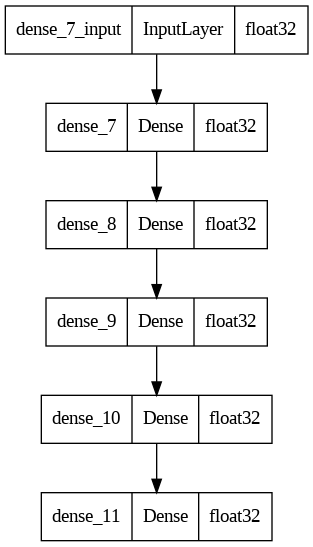

In [50]:
plot_model(model,show_dtype=True,to_file='model.png')

In [51]:
model.compile(optimizer=RMSprop(), loss= tf.keras.losses.binary_crossentropy,metrics='accuracy')

In [52]:
history= model.fit(x_train,y_train, epochs=10, batch_size=batch_size, verbose=2,validation_data=(x_test,y_test))

Epoch 1/10
38/38 - 1s - loss: 0.6416 - accuracy: 0.7921 - val_loss: 0.6138 - val_accuracy: 0.7940 - 1s/epoch - 27ms/step
Epoch 2/10
38/38 - 0s - loss: 0.5911 - accuracy: 0.7971 - val_loss: 0.5686 - val_accuracy: 0.7940 - 117ms/epoch - 3ms/step
Epoch 3/10
38/38 - 0s - loss: 0.5498 - accuracy: 0.7971 - val_loss: 0.5317 - val_accuracy: 0.7940 - 105ms/epoch - 3ms/step
Epoch 4/10
38/38 - 0s - loss: 0.5174 - accuracy: 0.7971 - val_loss: 0.5035 - val_accuracy: 0.7940 - 120ms/epoch - 3ms/step
Epoch 5/10
38/38 - 0s - loss: 0.4924 - accuracy: 0.7971 - val_loss: 0.4815 - val_accuracy: 0.7940 - 103ms/epoch - 3ms/step
Epoch 6/10
38/38 - 0s - loss: 0.4726 - accuracy: 0.7973 - val_loss: 0.4634 - val_accuracy: 0.7940 - 109ms/epoch - 3ms/step
Epoch 7/10
38/38 - 0s - loss: 0.4546 - accuracy: 0.8007 - val_loss: 0.4457 - val_accuracy: 0.8012 - 111ms/epoch - 3ms/step
Epoch 8/10
38/38 - 0s - loss: 0.4368 - accuracy: 0.8081 - val_loss: 0.4302 - val_accuracy: 0.8080 - 110ms/epoch - 3ms/step
Epoch 9/10
38/38 -

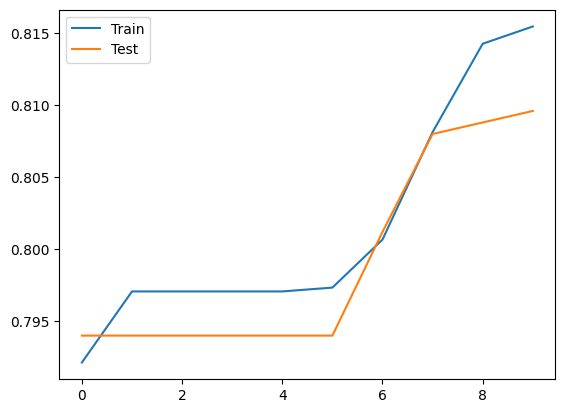

In [53]:
plt.plot(range(10),history.history['accuracy'],label='Train')
plt.plot(range(10),history.history['val_accuracy'],label='Test')
plt.legend()

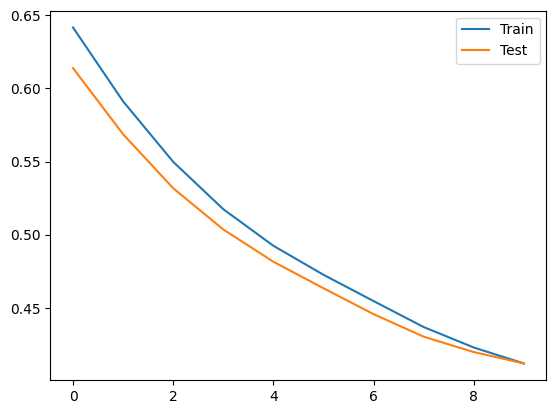

In [54]:
plt.plot(range(10),history.history['loss'],label='Train')
plt.plot(range(10),history.history['val_loss'],label='Test')
plt.legend()

In [55]:
y_pred= model.predict(x_test)

79/79 [==============================] - 1s 3ms/step


In [57]:
score= model.evaluate(x_test,y_test)
print(score)

79/79 [==============================] - 0s 3ms/step - loss: 0.4120 - accuracy: 0.8096
[0.41195258498191833, 0.8095999956130981]


In [59]:
pred=[]
for i in range(len(y_pred)):
  pred.append(np.argmax(y_pred[i]))
print(pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [60]:
act=[]
for i in range(len(y_test)):
  act.append(np.argmax(y_test[i]))
print(act)

[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 

In [61]:
df= pd.DataFrame(pred, columns=['Predicted'])
df['Actual']=act

In [62]:
df

,Predicted,Actual
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2495,0,0
2496,0,0
2497,0,0
2498,0,0


In [63]:
accuracy_score(df['Actual'],df['Predicted'])

0.8096